# BICYCLE COUNTER AT BERG
Number of Bike Passes to Slovakia and Austria at the Berg in 2016 by Time and Date of Transit

## The problem
The mayors of Bratislava and Berg agreed that there will be maintenance in the main road between the two cities somewhere next year. However, it needs to be on a season where it does not interrupt the daily commuters. Can you do an analysis and identify the best time to do the maintenance?

The mayors have a few specific times in mind and they would like to know if there is going to be people commuting in that road.

In [ ]:
from glob import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Loading

In [ ]:
df = pd.read_csv("Berg_bicycle_counter_2016_2019.csv")
df["date"] = pd.to_datetime(df["date"])

#This one is for you data from 2016 - 2018
df_train = df[df["date"] < pd.Timestamp(2019,1,1)].copy()

#This is "future" data. 2019 is the year that will be maintenance. Use this data only for testing your algorithms
df_test_filtered = df[df["date"] >= pd.Timestamp(2019,1,1)]
df_test = df_test_filtered[["date", "is_holiday", "tavg", "wspd", "pres"]].copy()
y_true = df_test_filtered[["hastrip"]]

In [ ]:
df_train.head(20)

,date,Hradza Berg,Do Slovenska,hastrip,is_holiday,tavg,wspd,pres
8759,2016-01-09 00:00:00,0.0,0.0,0.0,0.0,NaN,NaN,NaN
8760,2016-01-09 01:00:00,0.0,0.0,0.0,0.0,NaN,NaN,NaN
8761,2016-01-09 02:00:00,0.0,0.0,0.0,0.0,NaN,NaN,NaN
8762,2016-01-09 03:00:00,0.0,0.0,0.0,0.0,NaN,NaN,NaN
8763,2016-01-09 04:00:00,0.0,0.0,0.0,0.0,NaN,NaN,NaN
8764,2016-01-09 05:00:00,0.0,0.0,0.0,0.0,NaN,NaN,NaN
8765,2016-01-09 06:00:00,2.0,0.0,1.0,0.0,NaN,NaN,NaN
8766,2016-01-09 07:00:00,10.0,6.0,1.0,0.0,NaN,NaN,NaN
8767,2016-01-09 08:00:00,23.0,2.0,1.0,0.0,NaN,NaN,NaN
8768,2016-01-09 09:00:00,74.0,9.0,1.0,0.0,NaN,NaN,NaN


### Dataset overview
* "date" -> year, month, day, hour
* "Do Slovenska" -> Number of bicycle trips to Slovakia
* "Do Rakuska" -> Number of bicycle trips to Austria
* "hastrip" -> Flag that shows if there was any trip on that time (1 is yes and 0 is no) 
* "is_holiday" -> Flag that shows if the given day was an holiday in either Austria or Slovakia (1 is yes and 0 is no) 
* "Hradza Berg" -> Total of bicycle trips
* "tavg" -> average temperature on that day
* "wspd" -> average windspeed on that day
* "pres" -> average air pressure on that day

In [ ]:
#Example of dates that the mayors will ask
df_test.head(10)

,date,is_holiday,tavg,wspd,pres
0,2019-01-01 00:00:00,1.0,5.4,24.0,1024.3
1,2019-01-01 01:00:00,1.0,5.4,24.0,1024.3
2,2019-01-01 02:00:00,1.0,5.4,24.0,1024.3
3,2019-01-01 03:00:00,1.0,5.4,24.0,1024.3
4,2019-01-01 04:00:00,1.0,5.4,24.0,1024.3
5,2019-01-01 05:00:00,1.0,5.4,24.0,1024.3
6,2019-01-01 06:00:00,1.0,5.4,24.0,1024.3
7,2019-01-01 07:00:00,1.0,5.4,24.0,1024.3
8,2019-01-01 08:00:00,1.0,5.4,24.0,1024.3
9,2019-01-01 09:00:00,1.0,5.4,24.0,1024.3


## Data Manipulation

In [ ]:
print("How many NANs do we have on training set? ", df_train.isna().sum())
print("-"*100)
print("How many NANs do we have on test set? ", df_test.isna().sum())

How many NANs do we have on training set?  date               0
Hradza Berg        0
Do Slovenska       0
hastrip            0
is_holiday         0
tavg            3645
wspd            3717
pres            3645
dtype: int64
----------------------------------------------------------------------------------------------------
How many NANs do we have on test set?  date          0
is_holiday    0
tavg          0
wspd          0
pres          0
dtype: int64


In [ ]:
#we have NANs and that's not good!
df_train = df_train.dropna(axis=0)

In [ ]:
df_train.head(5)

,date,Hradza Berg,Do Slovenska,hastrip,is_holiday,tavg,wspd,pres
8783,2016-02-09 00:00:00,3.0,3.0,1.0,0.0,10.0,28.0,1003.3
8784,2016-02-09 01:00:00,0.0,0.0,0.0,0.0,10.0,28.0,1003.3
8785,2016-02-09 02:00:00,0.0,0.0,0.0,0.0,10.0,28.0,1003.3
8786,2016-02-09 03:00:00,0.0,0.0,0.0,0.0,10.0,28.0,1003.3
8787,2016-02-09 04:00:00,0.0,0.0,0.0,0.0,10.0,28.0,1003.3


In [ ]:
#Data Transformation Example
df_train['day'] = df_train.date.dt.day
df_train['month'] = df_train.date.dt.month
df_train['year'] = df_train.date.dt.year
df_train['hour'] = df_train.date.dt.hour
df_train['weekday'] = df_train.date.dt.weekday

df_test['day'] = df_test.date.dt.day
df_test['month'] = df_test.date.dt.month
df_test['year'] = df_test.date.dt.year
df_test['hour'] = df_test.date.dt.hour
df_test['weekday'] = df_test.date.dt.weekday

In [ ]:
df_train.head(5)

,date,Hradza Berg,Do Slovenska,hastrip,is_holiday,tavg,wspd,pres,day,month,year,hour,weekday
8783,2016-02-09 00:00:00,3.0,3.0,1.0,0.0,10.0,28.0,1003.3,9,2,2016,0,1
8784,2016-02-09 01:00:00,0.0,0.0,0.0,0.0,10.0,28.0,1003.3,9,2,2016,1,1
8785,2016-02-09 02:00:00,0.0,0.0,0.0,0.0,10.0,28.0,1003.3,9,2,2016,2,1
8786,2016-02-09 03:00:00,0.0,0.0,0.0,0.0,10.0,28.0,1003.3,9,2,2016,3,1
8787,2016-02-09 04:00:00,0.0,0.0,0.0,0.0,10.0,28.0,1003.3,9,2,2016,4,1


## Exploratory Data Analysis (EDA)

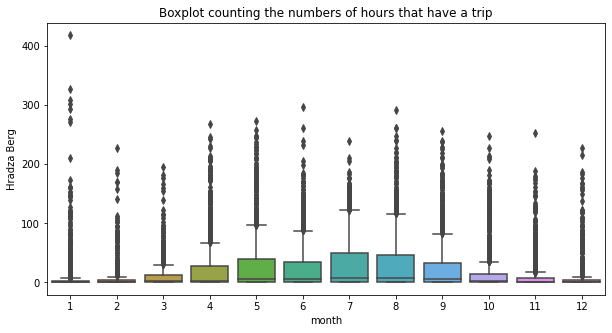

In [ ]:
#Data Analysis example
#Example 1
plt.figure(figsize=(10,5))
plt.title("Boxplot counting the numbers of hours that have a trip")
sns.boxplot(x="month", y="Hradza Berg", data=df_train)

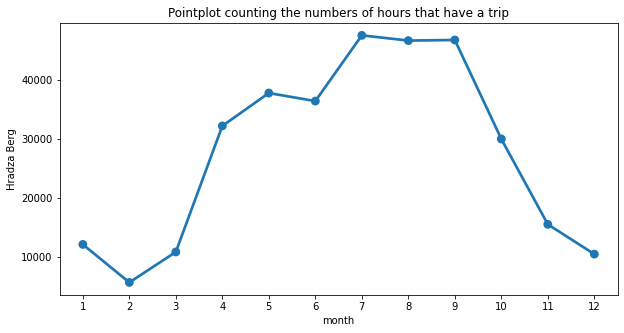

In [ ]:
#Example 2
df_grouped_hour = df_train.groupby(["month"]).sum().reset_index()
plt.figure(figsize=(10,5))
plt.title("Pointplot counting the numbers of hours that have a trip")
sns.pointplot(x="month", y="Hradza Berg", data=df_grouped_hour)

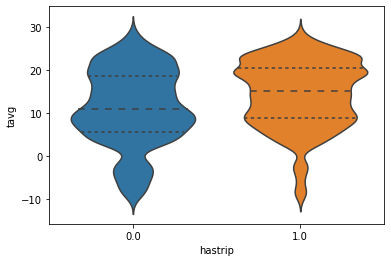

In [ ]:
# Example 3
plt.figure()
sns.violinplot(x="hastrip", y="tavg", data=df_train, inner="quart")

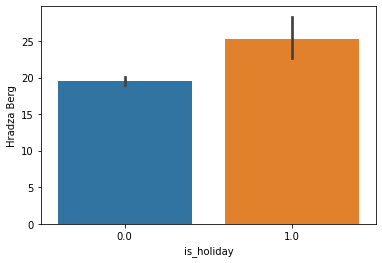

In [ ]:
# Example 4
plt.figure()
ax = sns.barplot(data=df_train, x='is_holiday', y="Hradza Berg")

### 🤔 Can you think of additional analysis that would be useful to present to the Mayor? Add them here!

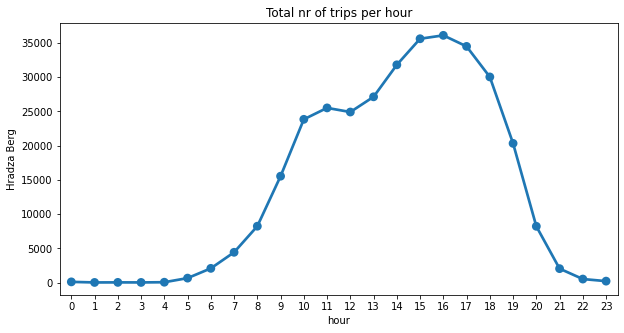

In [ ]:
df_grouped_hour = df_train.groupby(["hour"]).sum().reset_index()
plt.figure(figsize=(10,5))
plt.title("Total nr of trips per hour")
sns.pointplot(x="hour", y="Hradza Berg", data=df_grouped_hour)

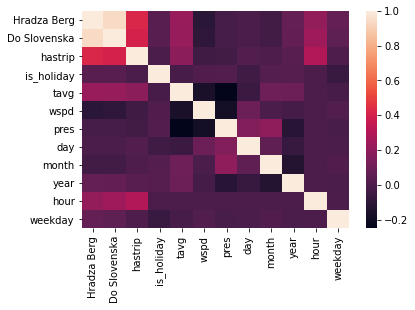

In [ ]:
corrMatrix = df_train.corr()
sns.heatmap(corrMatrix)
plt.show()

## Train and evaluate an algorithm

In [ ]:
df_train.head(5)

,date,Hradza Berg,Do Slovenska,hastrip,is_holiday,tavg,wspd,pres,day,month,year,hour,weekday
8783,2016-02-09 00:00:00,3.0,3.0,1.0,0.0,10.0,28.0,1003.3,9,2,2016,0,1
8784,2016-02-09 01:00:00,0.0,0.0,0.0,0.0,10.0,28.0,1003.3,9,2,2016,1,1
8785,2016-02-09 02:00:00,0.0,0.0,0.0,0.0,10.0,28.0,1003.3,9,2,2016,2,1
8786,2016-02-09 03:00:00,0.0,0.0,0.0,0.0,10.0,28.0,1003.3,9,2,2016,3,1
8787,2016-02-09 04:00:00,0.0,0.0,0.0,0.0,10.0,28.0,1003.3,9,2,2016,4,1


In [ ]:
# Prepare the data
columns_used = ["month", "hour", "tavg", "pres"]
X_train = df_train[columns_used]
y_train = df_train["hastrip"]

# Prepare the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Logistic regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
# Test on the dates mayor gave us
X_test = df_test[columns_used]

y_pred = model.predict(X_test)

Accuracy:  73.71973929236499


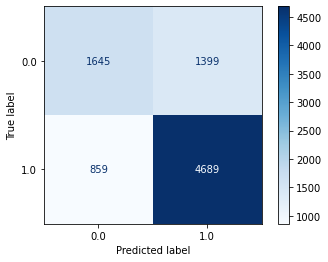

In [ ]:
# Evaluate the results
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score
acc_score = accuracy_score(y_true, y_pred)
print("Accuracy: ", acc_score*100)
plot_confusion_matrix(model, X_test, y_true, values_format = 'd', cmap=plt.cm.Blues)

### 🤔 How can you improve your model so that the Mayor trusts you?

Here are some tips:

+ Use a more powerful model (you can find several ones [here](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble))
+ Add more features to your model (for instance, `is_holiday`)
+ Normalize your features (check [this](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html))

### More features

Accuracy:  73.69646182495345


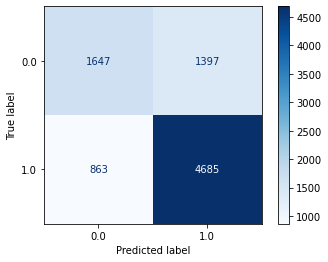

In [ ]:
# Prepare the data
columns_used = ["month", "hour", "weekday", "is_holiday", "tavg", "wspd", "pres"]
X_train = df_train[columns_used]
y_train = df_train["hastrip"]

# Prepare the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

# Test on the dates mayor gave us
X_test = df_test[columns_used]

y_pred = model.predict(X_test)

# Evaluate the results
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score
acc_score = accuracy_score(y_true, y_pred)
print("Accuracy: ", acc_score*100)
plot_confusion_matrix(model, X_test, y_true, values_format = 'd', cmap=plt.cm.Blues)

### New model: Random Forest

Accuracy:  83.88035381750466


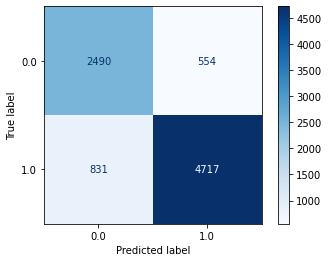

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Prepare the model
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

# Test on the dates mayor gave us
X_test = df_test[columns_used]

y_pred = model.predict(X_test)

# Evaluate the results
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score
acc_score = accuracy_score(y_true, y_pred)
print("Accuracy: ", acc_score*100)
plot_confusion_matrix(model, X_test, y_true, values_format = 'd', cmap=plt.cm.Blues)

### New model: xgboost

Accuracy:  85.39338919925513


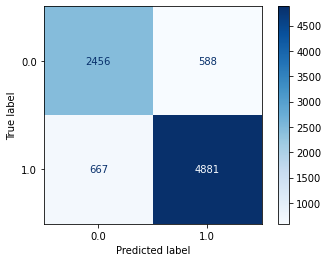

In [ ]:
from xgboost import XGBClassifier

# Prepare the model
model = XGBClassifier()
model.fit(X_train, y_train)

# Test on the dates mayor gave us
X_test = df_test[columns_used]

y_pred = model.predict(X_test)

# Evaluate the results
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score
acc_score = accuracy_score(y_true, y_pred)
print("Accuracy: ", acc_score*100)
plot_confusion_matrix(model, X_test, y_true, values_format = 'd', cmap=plt.cm.Blues)

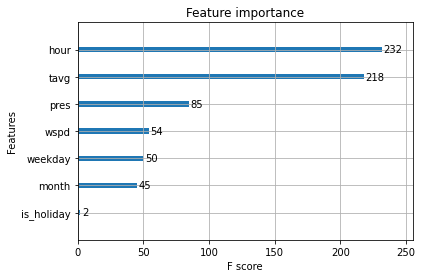

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# plot feature importance
plot_importance(model)
plt.show()

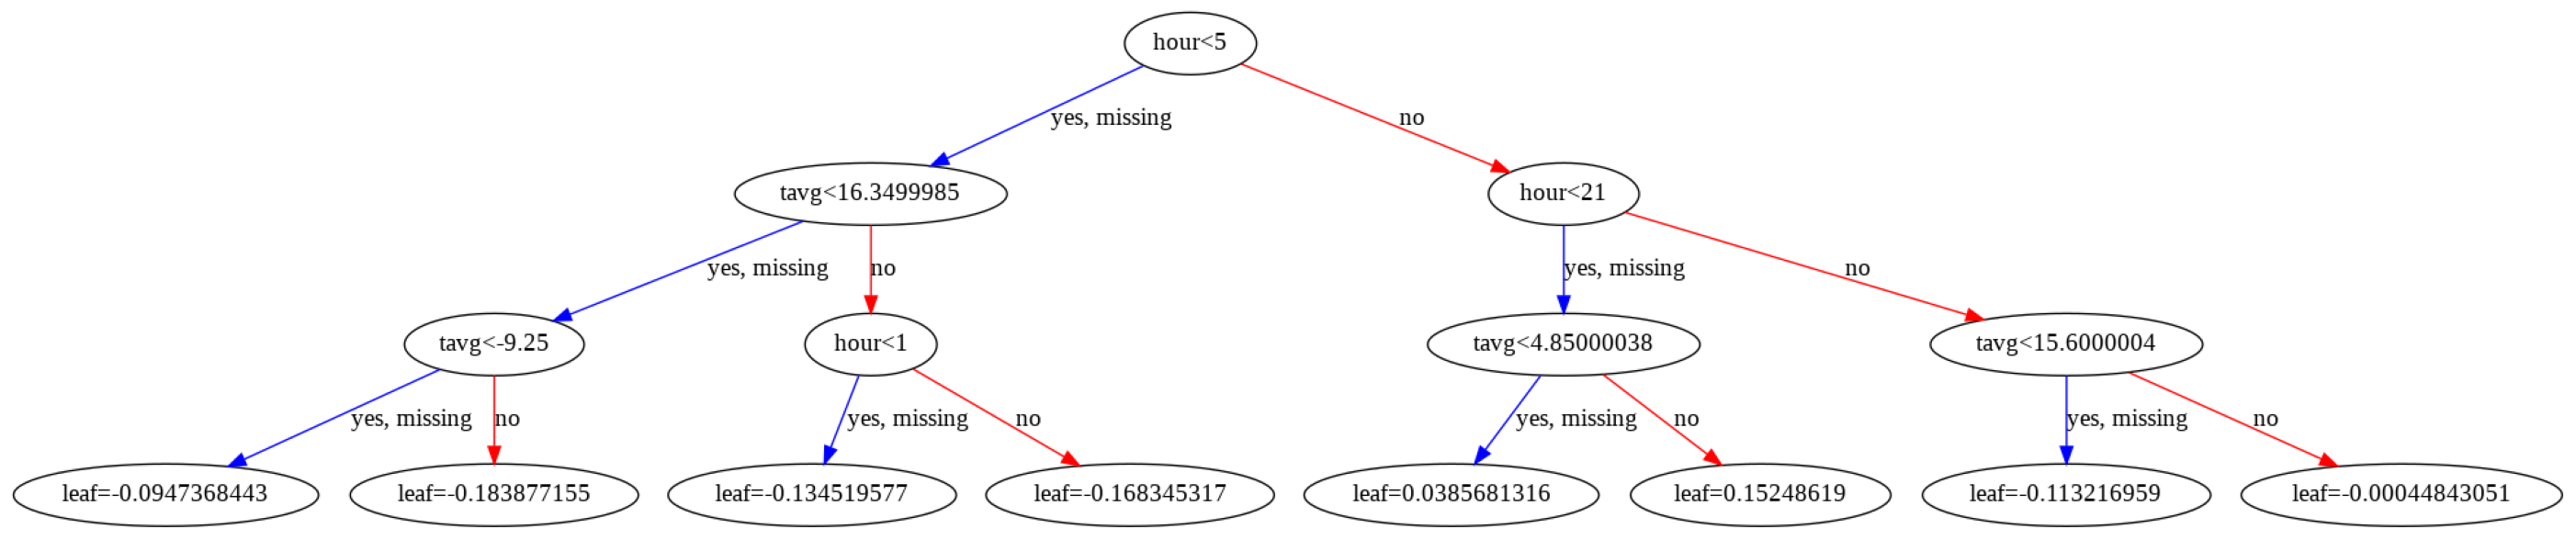

In [ ]:
from xgboost import plot_tree

ax = plot_tree(model)
fig = ax.figure
fig.set_size_inches(50, 30)